In [1]:
import numpy as np
# from skimage import io, color
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

https://www.ic.unicamp.br/~helio/disciplinas/MO443/trabalho2.pdf

## Reading the image

In [2]:
channel = 2

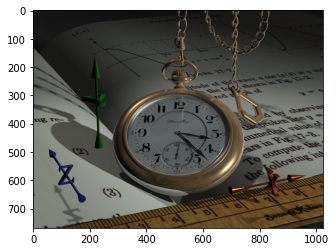

In [3]:
image = cv2.imread(f'watch.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
img.shape

(768, 1024, 3)

### Converting to HSV

In [5]:
lab = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lab.shape

(768, 1024, 3)

In [6]:
#Set the luminance channel to be used
luminance = lab[:,:,channel]

## Mask functions

In [7]:
def mask_Stucki(zigzag=True):
    
    idx_rows = np.array([1,2,-2,-1,0,1,2,-2,-1,0,1,2])
    idx_collumns = np.array([0,0,1,1,1,1,1,2,2,2,2,2])
    erro_tax = np.array([8/42,4/42,2/42,4/42,8/42,4/42,2/42,1/42,2/42,4/42,2/42,1/42])
    
    if zigzag:
        g = apply_masks_zigzag(idx_rows, idx_collumns, erro_tax)
    else:
        g = apply_masks(idx_rows, idx_collumns, erro_tax)
    
    return g*255

In [8]:
def mask_Steinberg(zigzag=True):
    
    idx_rows = np.array([1,-1,0,1])
    idx_collumns = np.array([0,1,1,1])
    erro_tax = np.array([7/16,3/16,5/16,1/16])
    
    if zigzag:
        g = apply_masks_zigzag(idx_rows, idx_collumns, erro_tax)
    else:
        g = apply_masks(idx_rows, idx_collumns, erro_tax)
    
    return g*255

In [9]:
def mask_Stevenson(zigzag=True):
    
    idx_rows = np.array([2,-3,-1,1,3,-2,0,+2,-3,-1,1,3])
    idx_collumns = np.array([0,1,1,1,1,2,2,2,3,3,3,3])
    erro_tax = np.array([32/200, 12/200, 26/200, 30/200, 16/200, 12/200, 26/200, 12/200, 5/200, 12/200, 12/200, 5/200])
    
    if zigzag:
        g = apply_masks_zigzag(idx_rows, idx_collumns, erro_tax)
    else:
        g = apply_masks(idx_rows, idx_collumns, erro_tax)
    
    return g*255

In [10]:
def mask_Burkes(zigzag=True):
    
    idx_rows = np.array([1,2,-2,-1,0,1,2])
    idx_collumns = np.array([0,0,1,1,1,1,1])
    erro_tax = np.array([8/32,4/32,2/32,4/32,8/32,4/32,2/32])
    
    if zigzag:
        g = apply_masks_zigzag(idx_rows, idx_collumns, erro_tax)
    else:
        g = apply_masks(idx_rows, idx_collumns, erro_tax)
    
    return g*255

In [11]:
def mask_Sierra(zigzag=True):
    
    idx_rows = np.array([1,2,-2,-1,0,1,2,-1,0,1])
    idx_collumns = np.array([0,0,1,1,1,1,1,2,2,2])
    erro_tax = np.array([5/32,3/32,2/32,4/32,5/32,4/32,2/32,2/32,3/32,2/32])
    
    if zigzag:
        g = apply_masks_zigzag(idx_rows, idx_collumns, erro_tax)
    else:
        g = apply_masks(idx_rows, idx_collumns, erro_tax)
    
    return g*255

In [12]:
def mask_Jarvis(zigzag=True):
    
    idx_rows = np.array([1,2,-2,-1,0,1,2,-2,-1,0,1,2])
    idx_collumns = np.array([0,0,1,1,1,1,1,2,2,2,2,2])
    erro_tax = np.array([7/48, 5/48,3/48,5/48,7/48,5/48,3/48,1/48,3/48,5/48,3/48,1/48])
    
    if zigzag:
        g = apply_masks_zigzag(idx_rows, idx_collumns, erro_tax)
    else:
        g = apply_masks(idx_rows, idx_collumns, erro_tax)
    
    return g*255

## Scrolling through the image

In [13]:
def apply_masks(idx_rows, idx_collumns, erro_tax):
    
    #Size of the edge (pixels that will be ignored)
    limit=4
    
    g = np.zeros([luminance.shape[0],luminance.shape[1]])
    f = lab[:,:,2].copy()

    for x in tqdm(range(luminance.shape[0] -limit)):
        for y in range(luminance.shape[1] -limit):

            if f[x,y] < 128:
                g[x,y] = 0
            else:
                g[x,y] = 1

            erro = f[x,y] - g[x,y]*255

            for index in zip(idx_rows, idx_collumns, erro_tax):
                f[x+index[0], y+index[1]] += (index[2]*erro)
                
       
    return g

In [14]:
def apply_masks_zigzag(idx_rows, idx_collumns, erro_tax):
    
    #Size of the edge (pixels that will be ignored)
    limit=4
    
    g = np.zeros([luminance.shape[0],luminance.shape[1]])
    f = lab[:,:,2].copy()
    
    for x in tqdm(range(luminance.shape[0] -limit)):
        if x%2 ==0:
            for y in range(luminance.shape[1] -limit):
                if f[x,y] < 128:
                    g[x,y] = 0
                else:
                    g[x,y] = 1

                erro = f[x,y] - g[x,y]*255

                for index in zip(idx_rows, idx_collumns, erro_tax):
                        f[x+index[0], y+index[1]] += (index[2]*erro)
        else:
            
            for y in range(luminance.shape[1] -limit,limit,-1):
                if f[x,y] < 128:
                    g[x,y] = 0
                else:
                    g[x,y] = 1

                erro = f[x,y] - g[x,y]*255
            
                for index in zip(idx_rows*-1, idx_collumns, erro_tax):
                    f[x-(index[0]), y+index[1]] += (index[2]*erro)
                
    return g

## Ploting the new image

In [15]:
def reconstruct_image(g, lab):
    img = cv2.cvtColor(np.stack([lab[:,:,0], lab[:,:,1], (g).astype(np.uint8)], axis=2), cv2.COLOR_HSV2RGB)
    return img

## Aplying the masks

In [16]:
def halftoning(mask, zigzag=True):
    """
    Recevies a function of a mask and return plot the representation.
    """
    lab_mask = lab.copy()
    g = mask(False)
    img_copy = reconstruct_image(g, lab_mask)

    #Validation for use the zigzag rolling method
    if zigzag:
        g = mask(True)
        img_copy_zigzag = reconstruct_image(g, lab_mask)

        fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 8))
        ax0.imshow(img)
#         ax0.set_title("Original Image")
        ax0.set_title("Imagem Original")

        ax1.imshow(img_copy)
#         ax1.set_title("Mask applied")
        ax1.set_title("Máscara Aplicada")

        ax2.imshow(img_copy_zigzag)
#         ax2.set_title("Mask applied in ZigZag")
        ax2.set_title("Máscara Aplicada ZigZag")
    else:
        fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
        ax0.imshow(img)
        ax0.set_title("Original Image")

        ax1.imshow(img_copy)
        ax1.set_title("Mask applied")

100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:26<00:00, 29.24it/s]


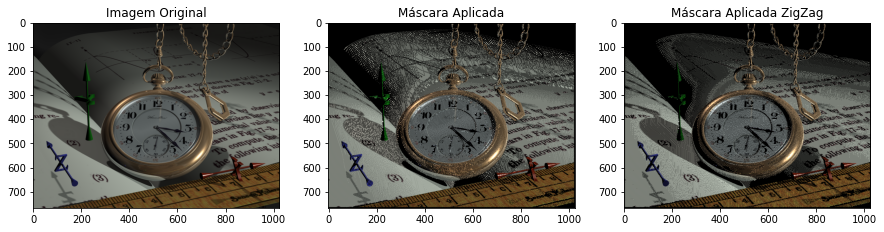

In [17]:
#Result Steinberg
halftoning(mask_Steinberg, True)

100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [01:01<00:00, 12.43it/s]


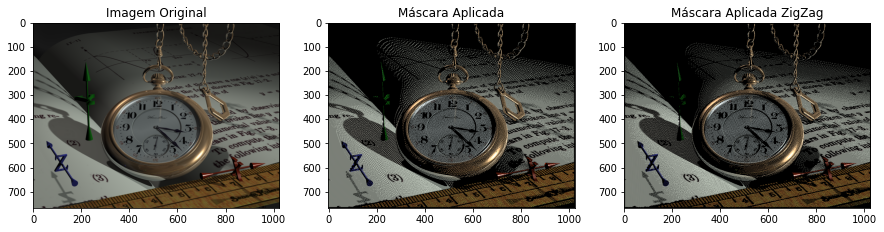

In [18]:
#Stevenson e Arce Result
halftoning(mask_Stevenson, True)

100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [01:02<00:00, 12.24it/s]


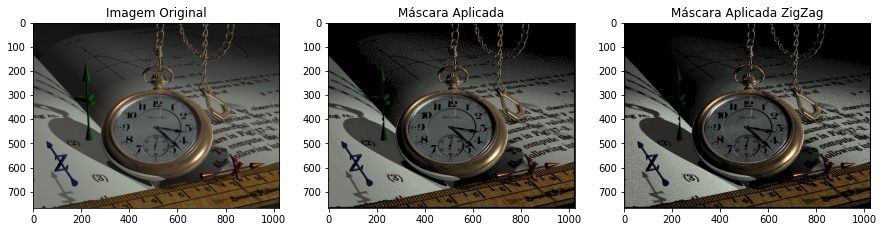

In [19]:
#Jarvis Result
halftoning(mask_Jarvis, True)

100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:39<00:00, 19.44it/s]


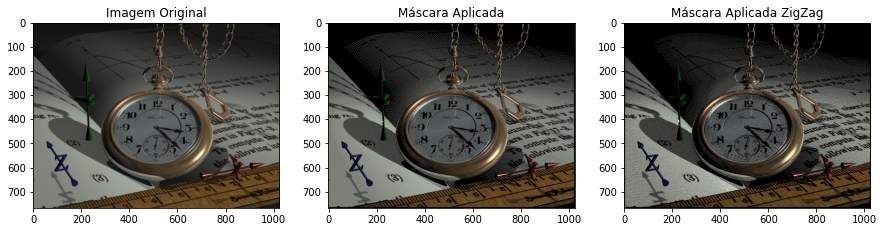

In [20]:
#Burkes Result
halftoning(mask_Burkes, True)

100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:53<00:00, 14.36it/s]


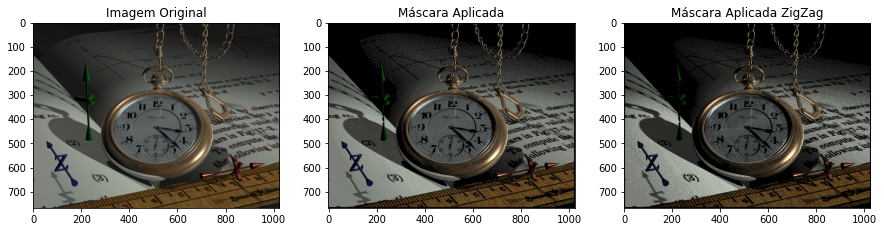

In [21]:
#Sierra Result
halftoning(mask_Sierra, True)

100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [01:01<00:00, 12.36it/s]


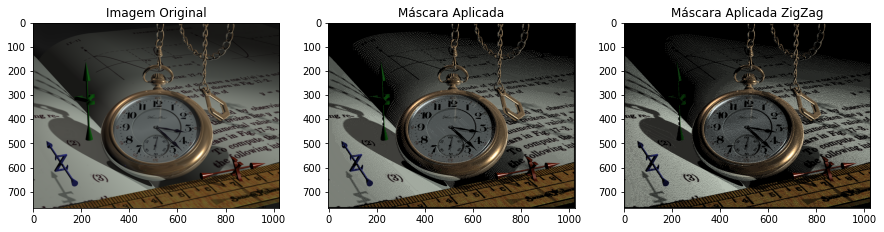

In [22]:
#Stucki Result
halftoning(mask_Stucki, True)